Question 1: What is Boosting in Machine Learning? Explain how it improves weak learners.

Ans. Boosting is an ensemble method that combines weak learners sequentially, each correcting previous errors to build a strong model.

Question 2: What is the difference between AdaBoost and Gradient Boosting in terms of how models are trained?

Ans. AdaBoost reweights misclassified samples, while Gradient Boosting fits new models to residual errors using gradient descent.

Question 3: How does regularization help in XGBoost?

Ans. Regularization (L1/L2) controls tree complexity, reduces overfitting, and improves generalization.

Question 4: Why is CatBoost considered efficient for handling categorical data?

Ans. CatBoost efficiently encodes categorical features using ordered statistics, avoiding one-hot encoding and target leakage.

Question 5: What are some real-world applications where boosting techniques are preferred over bagging methods?

Ans. Boosting is preferred in fraud detection, medical diagnosis, credit scoring, churn prediction, and recommendation systems.


Question 10: You're working for a FinTech company trying to predict loan default using customer demographics and transaction behavior.
The dataset is imbalanced, contains missing values, and has both numeric and categorical features.
Describe your step-by-step data science pipeline using boosting techniques:

● Data preprocessing & handling missing/categorical values

● Choice between AdaBoost, XGBoost, or CatBoost

● Hyperparameter tuning strategy

● Evaluation metrics you'd choose and why

● How the business would benefit from your model

Ans.  FinTech loan default pipeline using boosting

### Data preprocessing and handling missing/categorical values
- **Train/test split:** Stratified split to preserve class ratio; create a validation set for early stopping.
- **Leakage guard:** Remove post‑application features (e.g., collections flags), time‑consistent splits, and only use data known at decision time.
- **Missing values:**
  - **CatBoost:** Pass NaNs directly; it handles missing values natively.
  - **XGBoost/AdaBoost:** Impute numerics (**median**), categoricals (**most_frequent**) inside a pipeline; mark missing with a **missing indicator**.
- **Categorical encoding:**
  - **CatBoost:** Provide categorical feature indices; uses ordered target statistics to avoid leakage.
  - **XGBoost/AdaBoost:** Prefer **target encoding with CV** or **one‑hot** for low‑cardinality; avoid naive target encoding without folds.
- **Feature scaling:** Not needed for tree‑based boosting. Standardize only if using linear base estimators.
- **Class imbalance:** Use **class weights** or **scale_pos_weight** (ratio of negatives to positives), plus **threshold tuning** rather than oversampling; consider **SMOTE** only within CV to avoid leakage.

---

### Choice between AdaBoost, XGBoost, or CatBoost
- **CatBoost (primary choice):** Best fit for mixed numeric/categorical data, natively handles missing values and reduces target leakage via ordered encodings. Strong baseline with minimal preprocessing.
- **XGBoost (alternative):** Excellent performance and control; handles NaNs, but requires careful categorical encoding. Use when you need granular regularization and speed on large datasets.
- **AdaBoost (baseline only):** Simpler, but weaker with high-cardinality categoricals and complex interactions; use as a reference model.

Direct answer: Start with CatBoost for robustness and speed on this dataset; benchmark XGBoost for potential gains.

---

### Hyperparameter tuning strategy
- **Cross-validation:** Stratified K‑fold (e.g., 5‑fold) with **early stopping** on a validation fold, optimizing **PR‑AUC** or **ROC‑AUC**.
- **Search method:** **RandomizedSearch** or **Bayesian optimization** (faster than grid), then **fine grid** around the best region.
- **CatBoost key params:**
  - **iterations, learning_rate, depth**
  - **l2_leaf_reg (regularization)**
  - **border_count (bins), subsample**
  - **loss_function='Logloss', eval_metric='AUC'**
  - **class_weights** or **scale_pos_weight**
- **XGBoost key params:**
  - **n_estimators, learning_rate, max_depth**
  - **min_child_weight, gamma**
  - **subsample, colsample_bytree**
  - **reg_alpha (L1), reg_lambda (L2)**
  - **scale_pos_weight**
- **Practical tips:** Fix a small **learning_rate** (e.g., 0.05–0.1) and tune **iterations** with early stopping; constrain depth (3–6) to generalize; enable **monotonic constraints** if business rules require.

---

### Evaluation metrics and why
- **Primary:** **PR‑AUC** (sensitive to imbalance) and **ROC‑AUC** (global separability).
- **Threshold‑based:** **Recall**, **Precision**, **F1**, **Balanced Accuracy**, and **Specificity** at a business‑defined threshold.
- **Calibration:** **Calibration curve** and **Brier score** for probability quality; crucial for pricing and limits.
- **Risk discrimination:** **KS statistic** and **lift/precision at k%** (top‑risk decile).
- **Decisioning:** Use a **cost‑sensitive threshold** based on expected loss matrix (default cost vs. rejection cost vs. interest margin).

---

### How the business would benefit
- **Lower default rates:** Better early identification of high‑risk applicants enables tighter limits or rejections.
- **Risk‑based pricing:** Calibrated probabilities feed pricing models to set interest rates and credit lines.
- **Operational efficiency:** Focus manual reviews on the top‑risk segment; reduce false positives via threshold tuning.
- **Customer experience:** Approve more good customers by minimizing false declines with PR‑AUC‑driven optimization.
- **Compliance and explainability:** Use **SHAP** to explain decisions, supporting fair lending and auditability.
- **Monitoring and governance:** Track drift, stability (PSI), and recalibrate thresholds; schedule retrains to maintain performance.




In [1]:
#Question 6: Write a Python program to:
#● Train an AdaBoost Classifier on the Breast Cancer dataset
#● Print the model accuracy

# Import libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# 1. Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# 2. Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3. Train AdaBoost Classifier
ada_clf = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_clf.fit(X_train, y_train)

# 4. Predict on test set
y_pred = ada_clf.predict(X_test)

# 5. Print model accuracy
accuracy = accuracy_score(y_test, y_pred)
print("AdaBoost Classifier Accuracy:", accuracy)




AdaBoost Classifier Accuracy: 0.956140350877193


In [2]:
#Question 7: Write a Python program to:
#● Train a Gradient Boosting Regressor on the California Housing dataset
#● Evaluate performance using R-squared score

# Import libraries
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

# 1. Load dataset
data = fetch_california_housing()
X = data.data
y = data.target

# 2. Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Train Gradient Boosting Regressor
gbr = GradientBoostingRegressor(
    n_estimators=200,     # number of boosting stages
    learning_rate=0.1,    # step size shrinkage
    max_depth=3,          # depth of individual regression estimators
    random_state=42
)
gbr.fit(X_train, y_train)

# 4. Predict on test set
y_pred = gbr.predict(X_test)

# 5. Evaluate performance using R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)


R-squared Score: 0.8004451261281281


In [7]:
#Question 8: Write a Python program to:
#● Train an XGBoost Classifier on the Breast Cancer dataset
#● Tune the learning rate using GridSearchCV
#● Print the best parameters and accuracy


# Import libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings("ignore")

# 1. Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# 2. Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3. Define XGBoost Classifier
xgb_clf = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# 4. Define parameter grid for learning rate
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3]
}

# 5. Perform GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_clf,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# 6. Get best parameters and evaluate on test set
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Best Parameters:", best_params)
print("Test Accuracy:", accuracy)


Best Parameters: {'learning_rate': 0.1}
Test Accuracy: 0.9473684210526315


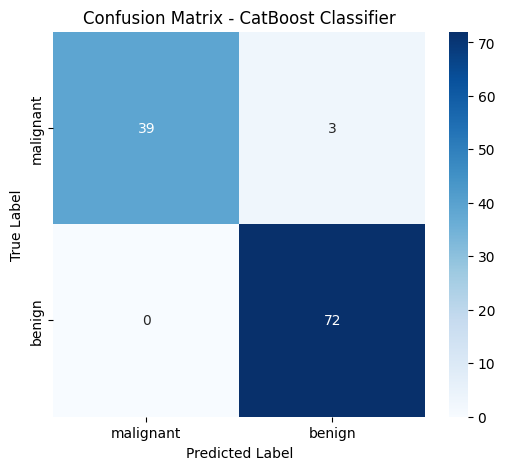


Classification Report:
               precision    recall  f1-score   support

   malignant       1.00      0.93      0.96        42
      benign       0.96      1.00      0.98        72

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



In [10]:
#Question 9: Write a Python program to:
#● Train a CatBoost Classifier
#● Plot the confusion matrix using seaborn



# Import libraries
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from catboost import CatBoostClassifier

# 1. Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# 2. Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3. Train CatBoost Classifier
cat_clf = CatBoostClassifier(
    iterations=200,
    learning_rate=0.1,
    depth=6,
    verbose=0,
    random_state=42
)
cat_clf.fit(X_train, y_train)

# 4. Predict on test set
y_pred = cat_clf.predict(X_test)

# 5. Compute Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# 6. Visualize Confusion Matrix using seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=data.target_names,
            yticklabels=data.target_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - CatBoost Classifier")
plt.show()

# 7. Optional: Print classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=data.target_names))
